In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [2]:
# simplified geographical limits
nav_lon = [-65, -40 ]
nav_lat = [ 26,  45]

Import NATL60 data

In [4]:
dataset_path = '/data/jean.legoff/data/RESAC-SARGAS60/data'
npz_data_file = 'natl60_htuv_01102012_01102013.npz'

In [5]:
data_set_filename = os.path.join(dataset_path,npz_data_file)

print(f"Reading data array from file {npz_data_file} ... ", flush=True)
npz_data = np.load(data_set_filename)

print('npz data contains: ',npz_data.files)

Reading data array from file natl60_htuv_01102012_01102013.npz ... 
npz data contains:  ['FdataAllVar', 'varlue']


In [6]:
# extraction from npz readed struct
dataset_array = npz_data['FdataAllVar']

# dimensions
n_var, n_time, n_lat, n_lon = np.shape(dataset_array) #(4L, 366L, 1296L, 1377L) 

print('extracted array has dimensions of',dataset_array.shape, ':')
print(' - ', n_var, 'variables')
print(' - ', n_time, 'time steps')
print(' - ', n_lat, 'latitudes')
print(' - ', n_lon, 'longitudes: ')

extracted array has dimensions of (4, 366, 1296, 1377) :
 -  4 variables
 -  366 time steps
 -  1296 latitudes
 -  1377 longitudes: 


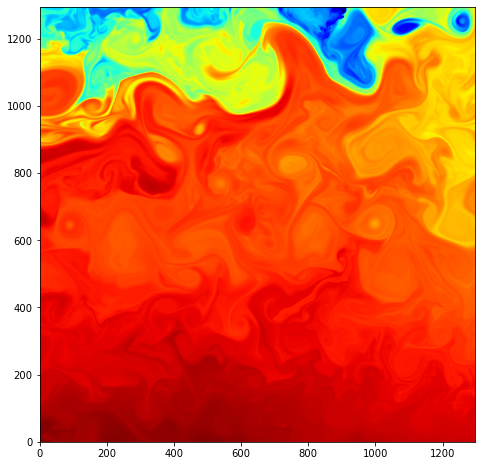

In [8]:
# all latitudes/longitudes for native (R1) resolution
all_native_lon = np.linspace(nav_lon[0], nav_lon[1], num=n_lon)
all_native_lat = np.linspace(nav_lat[0], nav_lat[1], num=n_lat)

ivariable = 1   # index of a variable to show 
idate = 0     # index of a plane (or day) to show

#  Plots first plane from the dataset array for sst ...
plt.figure(figsize=(12,8))
plt.imshow(dataset_array[ivariable,idate,:,:n_lat],origin='lower',cmap='jet')

Import Copernicus data

In [3]:
datapath = '/data/jean.legoff/data/Copernicus/OutputData/data_LON-64-42-LAT+26+44/'
modpath    = 'GLORYS12V1_PRODUCT_001_030'
extrapath = 'GLORYS12V1_PRODUCT_001_030-extra'

In [4]:
mult_datafile = os.path.join(datapath,modpath,'glorys12v1_mod_product_001_030_*.nc')
mod_ds = xr.open_mfdataset(mult_datafile)

In [5]:
mod_ds = mod_ds.sel(time=slice('2012-10-01', '2013-10-01'))
mod_ds = mod_ds.sel(latitude=slice(nav_lat[0], nav_lat[1]))
mod_ds = mod_ds.sel(longitude=slice(nav_lon[0], nav_lon[1]))


In [6]:
mod_ds

<xarray.Dataset>
Dimensions:    (latitude: 216, time: 366, longitude: 270)
Coordinates:
  * latitude   (latitude) float32 26.5 26.58 26.67 26.75 ... 44.25 44.33 44.42
  * time       (time) datetime64[ns] 2012-10-01T12:00:00 ... 2013-10-01T12:00:00
  * longitude  (longitude) float32 -64.25 -64.17 -64.08 ... -42.0 -41.92 -41.83
Data variables:
    sla        (time, latitude, longitude) float32 dask.array<chunksize=(31, 216, 270), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(31, 216, 270), meta=np.ndarray>
    uo         (time, latitude, longitude) float32 dask.array<chunksize=(31, 216, 270), meta=np.ndarray>
    vo         (time, latitude, longitude) float32 dask.array<chunksize=(31, 216, 270), meta=np.ndarray>
    thetao     (time, latitude, longitude) float32 dask.array<chunksize=(31, 216, 270), meta=np.ndarray>
Attributes: (12/25)
    title:                              daily mean fields from Global Ocean P...
    easting:                            longitude
    northing:                           latitude
    history:                            2021/09/02 23:29:48 MERCATOR OCEAN Ne...
    source:                             MERCATOR GLORYS12V1
    institution:                        MERCATOR OCEAN
    ...                                 ...
    FROM_ORIGINAL_FILE__longitude_max:  179.91667
    FROM_ORIGINAL_FILE__latitude_min:   -80.0
    FROM_ORIGINAL_FILE__latitude_max:   90.0
    z_min:                              0.494025
    z_max:                              5727.917
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention

In [7]:
mod_ds['sla'][0,:,:]

<xarray.DataArray 'sla' (latitude: 216, longitude: 270)>
dask.array<getitem, shape=(216, 270), dtype=float32, chunksize=(216, 270), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 26.5 26.58 26.67 26.75 ... 44.25 44.33 44.42
    time       datetime64[ns] 2012-10-01T12:00:00
  * longitude  (longitude) float32 -64.25 -64.17 -64.08 ... -42.0 -41.92 -41.83
Attributes:
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]
    comment:        The sea level anomaly was computed by the formula: sla = ...

In [28]:
str(mod_ds['time'][3].values)[:10]

'2012-10-04'

In [12]:
mod_ds['sla'][0,:,:]

<xarray.DataArray 'sla' (latitude: 216, longitude: 270)>
dask.array<getitem, shape=(216, 270), dtype=float32, chunksize=(216, 270), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 26.5 26.58 26.67 26.75 ... 44.25 44.33 44.42
    time       datetime64[ns] 2012-10-01T12:00:00
  * longitude  (longitude) float32 -64.25 -64.17 -64.08 ... -42.0 -41.92 -41.83
Attributes:
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]
    comment:        The sea level anomaly was computed by the formula: sla = ...

Load MDT data

In [18]:
extra_datafile = os.path.join(datapath,extrapath,'glorys12v1_mdt_mod_product_001_030.nc')
print(extra_datafile)
mdt_ds = xr.open_mfdataset(extra_datafile)

/data/jean.legoff/data/Copernicus/OutputData/data_LON-64-42-LAT+26+44/GLORYS12V1_PRODUCT_001_030-extra/glorys12v1_mdt_mod_product_001_030.nc


In [19]:
mdt_ds

<xarray.Dataset>
Dimensions:    (latitude: 216, longitude: 270)
Coordinates:
  * latitude   (latitude) float32 26.5 26.58 26.67 26.75 ... 44.25 44.33 44.42
  * longitude  (longitude) float32 -64.25 -64.17 -64.08 ... -42.0 -41.92 -41.83
Data variables:
    mdt        (latitude, longitude) float32 dask.array<chunksize=(216, 270), meta=np.ndarray>

In [21]:
mdt_ds = mdt_ds.sel(latitude=slice(nav_lat[0], nav_lat[1]))
mdt_ds = mdt_ds.sel(longitude=slice(nav_lon[0], nav_lon[1]))

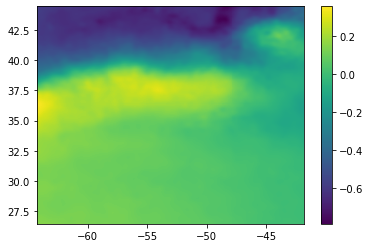

In [25]:
t = 1
plt.pcolor(mdt_ds['mdt'].longitude, mdt_ds['mdt'].latitude, mdt_ds['mdt'].to_numpy())
plt.colorbar()
plt.show()

Plot both data

In [33]:
for t in trange(n_time):
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(25,10))
    im = axes[0].pcolor(mod_ds['sla'][t,:,:].longitude, mod_ds['sla'][t,:,:].latitude, mod_ds['sla'][t,:].to_numpy()+mdt_ds['mdt'].to_numpy())
    im = axes[1].pcolor(all_native_lon, all_native_lat, dataset_array[0,t,:])
    plt.colorbar(im, ax=axes.ravel().tolist())
    axes[0].set_title('Mercator data')
    axes[1].set_title('NATL60')
    plt.savefig(f"/data/jean.legoff/ssh_liif/output_test/natl_mercator/natl_mercator_{t}.png") 

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html